<a href="https://colab.research.google.com/github/tawan-chaidee/Image_sternography/blob/main/IMG_STERNOGRAPHY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cat.jpg to cat (2).jpg


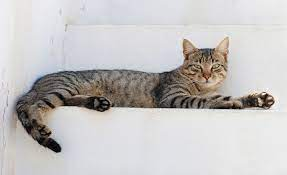

In [3]:
import cv2
import numpy as np
from PIL import Image
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the image file
uploaded = files.upload()
embed_img = next(iter(uploaded))
im = Image.open(embed_img)
display(im)

Tool to Encrypt and Decrypt message before using sternography (AES-128)

In [4]:
# AES-128
from cryptography.fernet import Fernet

def AES_encrypt(message):
  # Generate a random key
  key = Fernet.generate_key()
  # Turn string to bit
  encode_message = message.encode()

  # Encrypt the message
  cipher = Fernet(key)
  encrypted_data = cipher.encrypt(encode_message)

  return encrypted_data, key

def AES_decrypt(encrypted_data, key):
  cipher = Fernet(key)

  # Decrypt the data
  decrypted_data = cipher.decrypt(encrypted_data)

  return decrypted_data

#Encoding

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def encode_message(image, message):

    message = string_to_bits(message)
    data = np.array(image)
    message_bits = np.array([int(bit) for bit in message])

    # Calculate the number of bits needed to encode the message, including message length
    total_bits_needed = len(data) * len(data[0]) * 3

    # Check if the message fits within the image without repetitions
    if len(message_bits) + 16 > total_bits_needed:  # Add 16 bits for message length
        raise ValueError("Message is too long to be encoded without repetitions")

    # Convert the length of the message to binary (using 16 bits)
    message_length_bits = format(len(message), '016b')

    # Modify the least significant bit of each color channel pixel to encode the message length
    for i in range(16):  # Iterate over the 16 bits representing the message length
        data[0, i, 0] = (data[0, i, 0] & 0xFE) | int(message_length_bits[i])

    # Modify the least significant bit of each color channel pixel to encode the message
    for i in range(16, len(data)):
        for j in range(len(data[0])):
            for k in range(3):  # Iterate over RGB channels
                if len(message_bits) > 0:
                    data[i, j, k] = (data[i, j, k] & 0xFE) | message_bits[0]
                    message_bits = message_bits[1:]

    return Image.fromarray(data)


def display_images(original_img, modified_img):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(modified_img)
    axes[1].set_title('Modified Image with Hidden Message')
    axes[1].axis('off')
    plt.show()

def save_image(image, filename):
    image.save(filename)

def string_to_bits(message):
    # Convert each character to its binary representation
    # Using 8 bits for each character
    return ''.join(format(ord(char), '08b') for char in message)





# Decoding Image

In [6]:
import numpy as np
from PIL import Image

def decode_message(image):
    data = np.array(image)
    message_length_bits = ""

    # Extract the length of the message from the first 16 pixels
    for i in range(16):  # Iterate over the 16 bits representing the message length
        bit = data[0, i, 0] & 1  # Extract the least significant bit
        message_length_bits += str(bit)

    # Convert the binary string to integer to get the length of the message
    message_length = int(message_length_bits, 2)

    message_bits = []

    # Extract the message bits from the remaining pixels
    pixel_counter = 0
    for i in range(16, len(data)):
        for j in range(len(data[0])):
            for k in range(3):  # Iterate over RGB channels
                if pixel_counter < message_length:
                    # Extract the least significant bit
                    bit = data[i, j, k] & 1
                    message_bits.append(bit)
                    pixel_counter += 1
                else:
                    # All message bits have been extracted, exit the loop
                    break
            else:
                continue
            break
        else:
            continue
        break

    # Convert the extracted bits to a string
    message = ''.join([str(bit) for bit in message_bits])

    return message

def bits_to_string(bits):
    # Split the binary string into 8-bit chunks
    chunks = [bits[i:i+8] for i in range(0, len(bits), 8)]

    # Convert each chunk into its corresponding ASCII character
    return ''.join(chr(int(chunk, 2)) for chunk in chunks)

# Load the modified image with the hidden message
modified_img = Image.open("modified_image_with_hidden_message.png")

# Decode hidden message
decoded_message_bits = decode_message(modified_img)
decoded_message_str = bits_to_string(decoded_message_bits)
print("Decoded Message (String):", decoded_message_str)



Decoded Message (String): gAAAAABmGs9mZzuht-z89qNbH3umdV6BL_AqvoWLLOEv-iOJ5Rpt4DtUIbegZizANgF3fD9LEel8S9xI4ODxtdD-hHcVmOWqUP6Uqeub6m8udFH4vl_Q9tnXbzEsy-9scrr7rUcHalPUc4NYlHsEkFkFxotr41IE0XTlS3PilN_ioGiBiaFkTSJ1J1RRFvaRNWRNL1RMox8-NNEbiovIsqrBE9YRElEzTKBN2MVDTn6YbIdRHc66SVAv3POBYKGxnqqf8qHAKDrAaBFtfTW2fy5qCrK6cGg503jk7Il50xHEjACDaPgAPMu24qhDsOTQoYj2Hz40y-BbE0s9lfip0Wq-CWNY-v5kRStMuyCK74p2FVJjaWqC3Dmo0D-wz6cZr8bzkLZqfvdWuVLN8SK7cc6kvRj_mR5_q-q4XorbDjiz5zb6I4HpUcxZDJSPxoA-i6qQzqiLeHOrfHazGflwTk9zwZNtFjbP-ritehGHQRaF3kEiQnYtkxIM_fJyvVVo3twQX1DdtFSL-XSEnNKH9HX4o2LMxH7SEdSdNFc2gJvyU2VvxBScWIDClHXDdx7qFUjED0OTke7m5j3I76LkJqcJu2W3mJ0FbZewmaUuflTIE1qVgfZCUhizvgctLUKz3RoEhzuv4XKMEbLwxfgf_fW_lRQls4nyBiAnQzmweYTLwIP1R-QT4wAMvju9KRJLk2WG9BI5taIqBB53kvubpAUNSjph4kSpzS-NyIRgjew4NSGfymxQt2TxuIkMN0mK0j39QpfhTsHaigToGIlved1Qi1Aj5uG9EbLmavyz_VSkZK6bK5keYik_y4CMFjXVgvgF5eUQZQAFRG0yWxgJiXLGg24qMp01WqpuQvDNIXNWUMA_uwW3ZG6snVBP0pMGxgxzbpAvos3P8OoCPfM6jVpDhBSpuuGdW_Bd1DQWQRi-IE9rfxpBtce4eTJIyWwmqQ6wyclOrekwMW

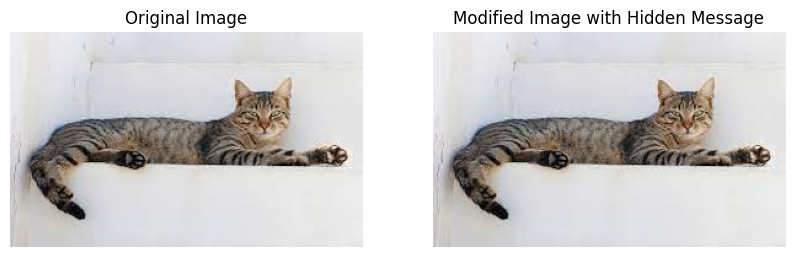

b"\nToday when I walked into my economics class I saw something I dread every time I close my eyes. Someone had brought their new gaming laptop to class. The Forklift he used to bring it was still running idle at the back. I started sweating as I sat down and gazed over at the 700lb beast that was his laptop. He had already reinforced his desk with steel support beams and was in the process of finding an outlet for a power cable thicker than Amy Schumer's thigh. I start shaking. I keep telling myself I'm going to be alright and that there's nothing to worry about. He somehow finds a fucking outlet. Tears are running down my cheeks as I send my last texts to my family saying I love them. The teacher starts the lecture, and the student turns his laptop on. The colored lights on his RGB Backlit keyboard flare to life like a nuclear flash, and a deep humming fills my ears and shakes my very soul. The entire city power grid goes dark. The classroom begins to shake as the massive fans begin 

In [8]:

# Define the message to be hidden
message = '''
Today when I walked into my economics class I saw something I dread every time I close my eyes. Someone had brought their new gaming laptop to class. The Forklift he used to bring it was still running idle at the back. I started sweating as I sat down and gazed over at the 700lb beast that was his laptop. He had already reinforced his desk with steel support beams and was in the process of finding an outlet for a power cable thicker than Amy Schumer's thigh. I start shaking. I keep telling myself I'm going to be alright and that there's nothing to worry about. He somehow finds a fucking outlet. Tears are running down my cheeks as I send my last texts to my family saying I love them. The teacher starts the lecture, and the student turns his laptop on. The colored lights on his RGB Backlit keyboard flare to life like a nuclear flash, and a deep humming fills my ears and shakes my very soul. The entire city power grid goes dark. The classroom begins to shake as the massive fans begin to spin. In mere seconds my world has gone from vibrant life, to a dark, earth shattering void where my body is getting torn apart by the 150mph gale force winds and the 500 decibel groan of the cooling fans. As my body finally surrenders, I weep, as my school and my city go under. I fucking hate gaming laptops.
'''

secret_message,key = AES_encrypt(message)
secret_message_str = secret_message.decode('utf-8')

# Encode the message into the image
modified_img = encode_message(im, secret_message_str)

# Display the original and modified images
display_images(im, modified_img)

# Save the modified image
save_image(modified_img, "modified_image_with_hidden_message.png")

# Load the modified image with the hidden message
modified_img = Image.open("modified_image_with_hidden_message.png")

# Decode hidden message
decoded_message_bits = decode_message(modified_img)
decoded_message_str = bits_to_string(decoded_message_bits)
decoded_message_str = AES_decrypt(decoded_message_str,key)

print(decoded_message_str)


